In [1]:
import pandas as pd

df = pd.read_csv('model_summary.csv', index_col=0)
df

,Loss,Accuracy,Precision,Recall,F1,Specificity
Train,0.769268,0.976500,0.976548,0.976500,0.976463,0.992101
Validation,0.874749,0.882200,0.891530,0.882200,0.884323,0.958633
Test,0.857506,0.884375,0.884839,0.884375,0.884522,0.900000


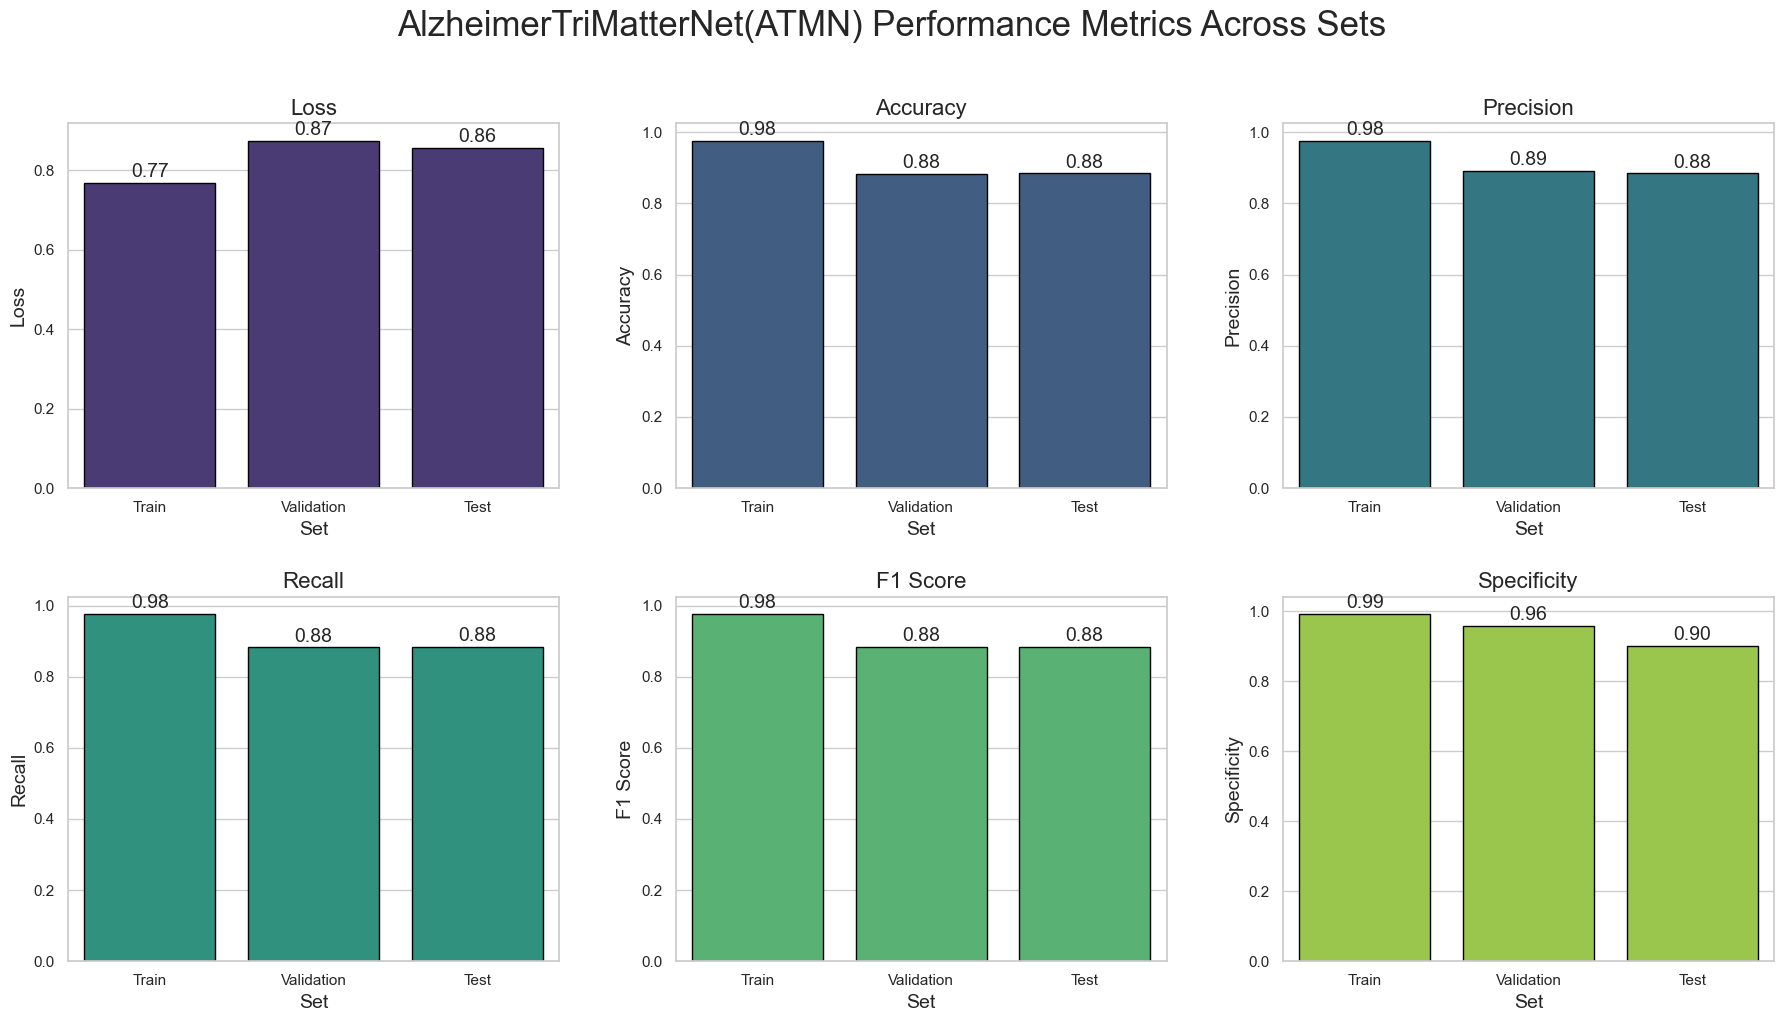

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Your model summary data
data = {
    'Loss': [0.769268, 0.874749, 0.857506],
    'Accuracy': [0.976500, 0.882200, 0.884375],
    'Precision': [0.976548, 0.891530, 0.884839],
    'Recall': [0.976500, 0.882200, 0.884375],
    'F1 Score': [0.976463, 0.884323, 0.884522],
    'Specificity': [0.992101, 0.958633, 0.900000]
}

index = ['Train', 'Validation', 'Test']

df = pd.DataFrame(data, index=index)

# Set the Seaborn style and color palette
sns.set_theme(style="whitegrid")
viridis_palette = sns.color_palette("viridis", n_colors=len(df.columns))

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i, (col, ax, color) in enumerate(zip(df.columns, axes.flatten(), viridis_palette)):
    sns.barplot(x=df.index, y=df[col], ax=ax, color=color, edgecolor='black')  # Increase linewidth
    
    # Annotating each bar with its value on top
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.005,
                f'{height:.2f}', ha='center', va='bottom', fontsize=14)

    ax.set_title(col, fontsize=16)
    ax.set_ylabel(col, fontsize=14)
    ax.set_xlabel('Set', fontsize=14)

plt.suptitle('AlzheimerTriMatterNet(ATMN) Performance Metrics Across Sets', fontsize=25, y=1.02)
plt.tight_layout(h_pad=2, w_pad=3.5)
plt.show()